# Statistical Filtering / p value 

In [4]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
import sys
import os
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(1, module_path + '/src/')

import utility

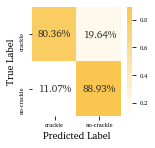

In [5]:
X, y =  utility.get_X_y('noDecomp', feature_type = 'all')

kwargs = dict(test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, **kwargs)


clf = KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
utility.plot_cm(cm, 3)

In [6]:
row_mean_test = X_test.mean(axis = 0)
row_mean_train = X_train.mean(axis = 0)
p = []
from scipy.stats import ttest_ind
for row in X_test.iterrows():
    _,p_new = ttest_ind(row_mean_train, row[1].to_numpy())
    p.append(p_new)


d = {'True': y_test, 'Pred': y_pred, 'P-val': p}
df = pd.DataFrame(data = d)
#print(df.head(100))
significant_lev = 0.10
significant = (df['P-val'] > significant_lev)  
insignificant = (df['P-val'] < significant_lev)  
wrong_pred = (df['True'] != df['Pred'])
true_pred = (df['True'] == df['Pred'])
sig_wrong = np.logical_and(significant, wrong_pred)
insig_wrong = np.logical_and(insignificant, wrong_pred)

sig_true = np.logical_and(significant, true_pred)
insig_true = np.logical_and(insignificant, true_pred)


print(f'Wrong classification, being significant: {sum(sig_wrong)} ')
print(f'Wrong classification, not being significant: {sum(insig_wrong)}')
print('\n \n')
print(f'True classification, being significant: {sum(sig_true)} ')
print(f'True classification, not being significant: {sum(insig_true)}')

Wrong classification, being significant: 88 
Wrong classification, not being significant: 11

 

True classification, being significant: 438 
True classification, not being significant: 97
